# AutoGen Code Functions Example

Start by installing the following dependencies:


In [38]:
%pip install pyautogen==0.2.25
%pip install matplotlib
%pip install pandas
%pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable




[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Grab ChatGPT key from OS

In [39]:
import os
import autogen 

llm_config = {"model": "gpt-4-turbo", "api_key": os.environ["OPENAI_API_KEY"]}

## Create 2 Agents to collaborate on Code

Use a special kind of Agent to propose code examples, then run it.

[LocalCommandLineCodeExecutor](https://microsoft.github.io/autogen/docs/reference/coding/local_commandline_code_executor/)

> This will execute or save LLM generated code on the local machine.

> Each code block is saved as a file in the working directory. Depending on the execution policy, the code may be executed in a separate process. The code blocks are executed or save in the order they are received. Command line code is sanitized against a list of dangerous commands to prevent self-destructive commands from being executed, which could potentially affect the user's environment. Supported languages include Python, shell scripts (bash, shell, sh), PowerShell (pwsh, powershell, ps1), HTML, CSS, and JavaScript. Execution policies determine whether each language's code blocks are executed or saved only.

In [40]:
working_dir = "stock_plotter"

In [41]:
from autogen.coding import LocalCommandLineCodeExecutor

executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir=working_dir,
)

## Create Agents

In [42]:
from autogen import ConversableAgent, AssistantAgent

## Code **Executing** Agent

This agent is a code executer agent.  This will always take input from a human and will be the main agent the operates the workflow.

[ConversableAgent](https://microsoft.github.io/autogen/docs/reference/agentchat/conversable_agent/)

> A class for generic conversable agents which can be configured as assistant or user proxy.

> After receiving each message, the agent will send a reply to the sender unless the msg is a termination msg. For example, AssistantAgent and UserProxyAgent are subclasses of this class, configured with different default settings.



In [43]:
code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

## Code **Writing** Agent

This is a special type of AutoGen Agent that has code writing capabilities built in.

[AssistantAgent](https://microsoft.github.io/autogen/docs/reference/agentchat/assistant_agent/)

> AssistantAgent is a subclass of ConversableAgent configured with a default system message. The default system message is designed to solve a task with LLM, including suggesting python code blocks and debugging. human_input_mode is default to "NEVER" and code_execution_config is default to False. This agent doesn't execute code by default, and expects the user to execute the code.

In [44]:
code_writer_agent = AssistantAgent(
    name="code_writer_agent",
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

### Print the default User Message

This will show the default functions built into the *AssistantAgent* which includes default language about being a _Python_ agent and other instructions.

In [45]:
code_writer_agent_system_message = code_writer_agent.system_message
print(code_writer_agent_system_message)

You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
    1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
    2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feed

## Agent Collaboration - Stock Analysis

Ask the two agents to collaborate on a stock analysis task.

### Initial Query

Set the date, and ask the Agent for code about how to create code to plot results and create a plot of the results that are saved to a file named `ytd_stock_gains.png`

In [46]:
import datetime

today = datetime.datetime.now().date()
message = f"Today is {today}. "\
"Create a plot showing stock gain YTD for NVDA and TLSA. "\
"Make sure the code is in markdown code block and save the figure"\
" to a file ytd_stock_gains.png."""

## Run the code executor agent

Run the `code_executor_agent` with the `message` to get the resulting file created.

This will wait for user input, for additional instructions, or allow the user to hit enter to end the operation

In [49]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=message,
)

code_executor_agent (to code_writer_agent):

Today is 2024-08-23. Create a plot showing stock gain YTD for NVDA and TLSA. Make sure the code is in markdown code block and save the figure to a file ytd_stock_gains.png.

--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

To accomplish this task, we'll need to do the following:

1. Fetch the stock price data for Nvidia Corporation (NVDA) and Tesla Inc (TSLA) for the year 2024.
2. Calculate the Year-To-Date (YTD) gains for both stocks.
3. Plot these gains on a graph.
4. Save the plot to a file named `ytd_stock_gains.png`.

Let's start by fetching the necessary stock data. Since we can't browse the web or access an API directly, I'll provide you with a Python script to fetch and plot the necessary data using the `yfinance` library. This library is widely used for fetching historical market data from Yahoo Finance.

First, please ensure you have the necessary Python p

Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  



>>>>>>>> NO HUMAN INPUT RECEIVED.

>>>>>>>> USING AUTO REPLY...

>>>>>>>> EXECUTING 2 CODE BLOCKS (inferred languages are [sh, python])...
code_executor_agent (to code_writer_agent):

exitcode: 0 (execution succeeded)
Code output: Figure(1000x500)


--------------------------------------------------------------------------------
code_writer_agent (to code_executor_agent):

Great! The script executed successfully and plotted the Year-To-Date (YTD) stock gains for NVDA and TSLA. The plot was displayed and saved to a file named `ytd_stock_gains.png`.

If you want to check, you can locate this file in the directory where you ran the script. The file will contain the graph depicting the stock performance from the beginning of 2024 up to today, showing how the stock prices have changed percentage-wise.

If you have any other questions or need further assistance, feel free to ask!

TERMINATE

--------------------------------------------------------------------------------


Provide feedback to code_writer_agent. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  exit


## View the file created

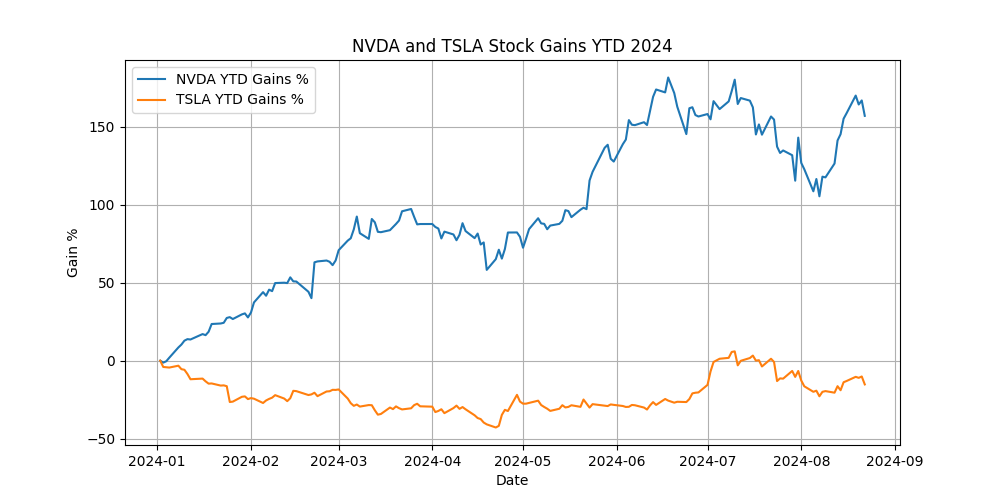

In [50]:
import os
from IPython.display import Image

Image(os.path.join(working_dir, "ytd_stock_gains.png"))

## User-Defined Functions

Instead of asking LLM to generate the code for downloading stock data 
and plotting charts each time, you can define functions for these two tasks and have LLM call these functions in the code.

### **get_stock_prices()** - function to get stock prices

Input a list of symbols and the output will be a _pandas_ data frame with the stock info.

In [ ]:
def get_stock_prices(stock_symbols, start_date, end_date):
    """Get the stock prices for the given stock symbols between
    the start and end dates.

    Args:
        stock_symbols (str or list): The stock symbols to get the
        prices for.
        start_date (str): The start date in the format 
        'YYYY-MM-DD'.
        end_date (str): The end date in the format 'YYYY-MM-DD'.
    
    Returns:
        pandas.DataFrame: The stock prices for the given stock
        symbols indexed by date, with one column per stock 
        symbol.
    """
    import yfinance

    stock_data = yfinance.download(
        stock_symbols, start=start_date, end=end_date
    )
    return stock_data.get("Close")

### **plot_stock_prices()** - function to plot the data on a *matplotlib*

Input the *pandas* dataframe with stock info and create a png with the info plotted.

In [ ]:
def plot_stock_prices(stock_prices, filename):
    """Plot the stock prices for the given stock symbols.

    Args:
        stock_prices (pandas.DataFrame): The stock prices for the 
        given stock symbols.
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 5))
    for column in stock_prices.columns:
        plt.plot(
            stock_prices.index, stock_prices[column], label=column
                )
    plt.title("Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.savefig(filename)

## Executor with user defined functions

We must create a new executor, and register the functions we just created to it.

In [ ]:
executor = LocalCommandLineCodeExecutor(
    timeout=60,
    work_dir=working_dir,
    functions=[get_stock_prices, plot_stock_prices],
)

## Look at System message to confirm functions are registered

You can now output the message and see the functions we created have been automatically added.

In [ ]:
code_writer_agent_system_message += executor.format_functions_for_prompt()
print(code_writer_agent_system_message)

## Update Agents

Now that the system message has been updated with the functions, we will re-configure the 2 agents to use the new system_message

In [ ]:
code_writer_agent = ConversableAgent(
    name="code_writer_agent",
    system_message=code_writer_agent_system_message,
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

code_executor_agent = ConversableAgent(
    name="code_executor_agent",
    llm_config=False,
    code_execution_config={"executor": executor},
    human_input_mode="ALWAYS",
    default_auto_reply=
    "Please continue. If everything is done, reply 'TERMINATE'.",
)

## Start Task Again

Same task as before, but with new executor, that will use our registered functions, instead of writing the code to perform the tasks.

In [ ]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=f"Today is {today}."
    "Download the stock prices YTD for NVDA and TSLA and create"
    "a plot. Make sure the code is in markdown code block and "
    "save the figure to a file stock_prices_YTD_plot.png.",
)

### Finally check the plot to see the results

In [ ]:
Image(os.path.join(working_dir, "stock_prices_YTD_plot.png"))